Exercise 1 Regression
Imports

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error


Ordinary Least Squares Regression

In [4]:
df = pd.read_csv('dataUsed/data.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] # removes unamed column (https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe)

print(df.corr(method='pearson')['SUS'].sort_values()) # display pearson coefficient

x = df.drop(columns='SUS')
y = df['SUS']

x = sm.add_constant(x) # add intercept 
regressionModel = sm.OLS(y,x).fit()

print(regressionModel.summary())



Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Name: SUS, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        22:10:38   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err

Statistically influential variables (in order of influence)
1. Duration: P-vlaue of 0.980
2. Purchase: P-vlaue of 0.716
3. Gender: P-value of 0.672

Statisically uninfluential variable 
ASR_Error and Intent_Error both had a P-value of under 0.05

Regression Analysis

The MSE of the linear regression model is:  47.2876860024508
The R^2 value is  0.655136478978626


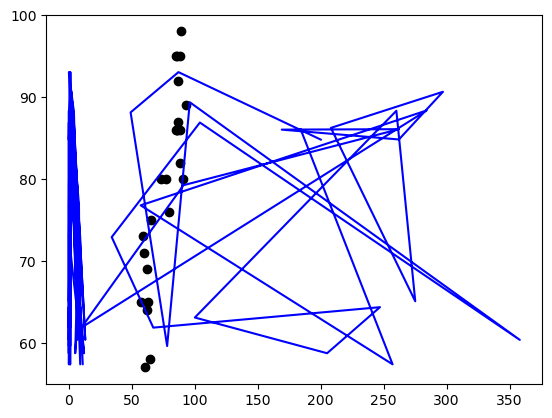

In [4]:
#Evalute using MSE
x_train, x_test, y_train, y_test = train_test_split(x,y)

lr = LinearRegression().fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print("The MSE of the linear regression model is: ", mean_squared_error(y_test, y_test_pred))
print("The R^2 value is ", lr.score(x_test, y_test))

plt.scatter(y_test_pred,y_test, color='black')
plt.plot(x_test,y_test_pred, color='blue')




plt.show()
